# FOR TRAINING

---



In [1]:
!apt-get install locales -y
!locale-gen en_US.UTF-8
!update-locale LANG=en_US.UTF-8
import os
os.environ["LANG"] = "en_US.UTF-8"
os.environ["LC_ALL"] = "en_US.UTF-8"


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
locales is already the newest version (2.35-0ubuntu3.8).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Generating locales (this might take a while)...
  en_US.UTF-8... done
Generation complete.


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="0u38SAg9fKgSkdLEgj1l")
project = rf.workspace("cv-pyvkz").project("fetal-brain-on-augmented-images")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fetal-brain-on-augmented-images-1 in yolov8:: 100%|██████████| 2958/2958 [00:00<00:00, 6459.52it/s]


In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 911.4/911.4 kB 11.5 MB/s eta 0:00:00


In [4]:
# prompt: /content/weights.zip
# unzip this folder in/content/Fetal-brain-on-augmented-images-1 this folder

import zipfile

# Specify the path to the zip file and the extraction directory
zip_file_path = "/content/weights (2).zip"
extract_dir = "/content/Fetal-brain-on-augmented-images-1"

# Create the extraction directory if it doesn't exist
import os
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

FileNotFoundError: [Errno 2] No such file or directory: '/content/weights (2).zip'

In [5]:
# prompt: /content/Fetal-brain-on-augmented-images-1/train/labels
# create a folder which has files from the label folder which has nothing in it

import os
import shutil

# Define source and destination folders
source_folder = "/content/Fetal-brain-on-augmented-images-1/train/labels"
destination_folder = "/content/empty_labels"  # Replace with your desired destination

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Iterate through files in the source folder
for filename in os.listdir(source_folder):
    source_path = os.path.join(source_folder, filename)
    destination_path = os.path.join(destination_folder, filename)

    #Check if the file is empty
    if os.stat(source_path).st_size == 0:
        # Copy empty files to the destination folder
        shutil.copy2(source_path, destination_path)

In [6]:
# prompt: /content/empty_labels
# the files inside which have the similar names as these in the images folder, create another folder and move the images there

import os
import shutil

# Define source and destination folders
image_folder = "/content/Fetal-brain-on-augmented-images-1/train/images"
label_folder = "/content/empty_labels"
destination_image_folder = "/content/moved_images"

# Create the destination folder if it doesn't exist
os.makedirs(destination_image_folder, exist_ok=True)

# Iterate through the label files
for filename in os.listdir(label_folder):
    label_path = os.path.join(label_folder, filename)

    # Extract the base filename without extension
    base_filename = os.path.splitext(filename)[0]

    # Construct the corresponding image file path
    image_filename = base_filename + ".jpg"  # Assuming images are JPGs
    image_path = os.path.join(image_folder, image_filename)

    # Check if the image file exists
    if os.path.exists(image_path):
      destination_image_path = os.path.join(destination_image_folder, image_filename)
      shutil.move(image_path, destination_image_path)

In [7]:
%%writefile /content/Fetal-brain-on-augmented-images-1/data.yaml
train: /content/Fetal-brain-on-augmented-images-1/train
val: /content/Fetal-brain-on-augmented-images-1/valid

nc: 2  # Replace with the actual number of classes in your dataset
names: ['abnormality','fetal skull'] # Replace with your actual class names

Overwriting /content/Fetal-brain-on-augmented-images-1/data.yaml


In [8]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 118MB/s]


In [ ]:
# Train the model
model.train(
    data="/content/Fetal-brain-on-augmented-images-1/data.yaml",  # Path to your data.yaml file
    epochs=50,                 # Number of epochs
    imgsz=640,                 # Image size
    batch=20,                  # Batch size
    device= 0                 # Use GPU (0) or CPU (-1)
)

In [ ]:
# prompt: /content/runs/detect/train/weights these are all images in this folder display them

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

image_dir = "/content/runs/detect/train/"

# Check if the directory exists
if os.path.exists(image_dir):
    # Get a list of all image files in the directory
    image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    # Iterate through the image files and display them
    for image_file in image_files:
        image_path = os.path.join(image_dir, image_file)
        try:
            img = mpimg.imread(image_path)
            plt.imshow(img)
            plt.title(image_file)
            plt.axis('off')  # Hide axes
            plt.show()
        except Exception as e:
            print(f"Error displaying image {image_file}: {e}")
else:
    print(f"Directory '{image_dir}' not found.")

In [9]:
from ultralytics import YOLO

# Load the trained model from the best.pt file
model = YOLO('/content/best.pt')


image 1/1 /content/Fetal-brain-on-augmented-images-1/train/images/anold-chiari-maformation-26b_aug_0_png.rf.cd56258a951d6185db6c5b570acfcee5.jpg: 640x640 1 abnormality, 1 fetal skull, 399.4ms
Speed: 11.9ms preprocess, 399.4ms inference, 36.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


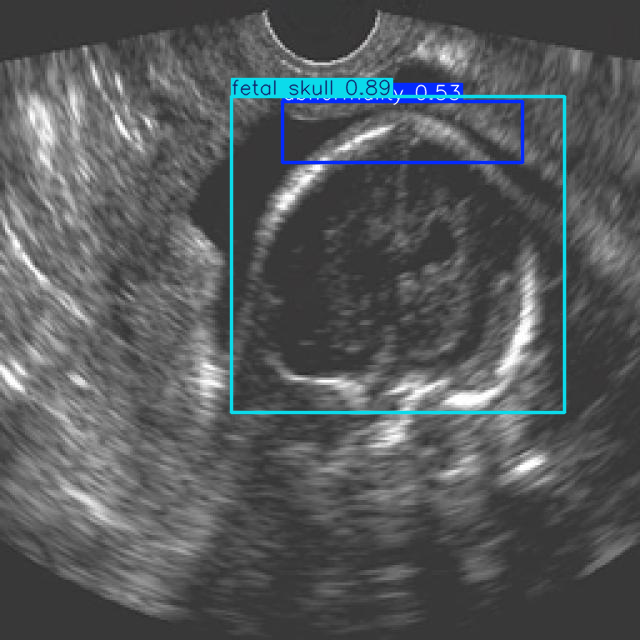

In [10]:
results = model.predict(source="/content/Fetal-brain-on-augmented-images-1/train/images/anold-chiari-maformation-26b_aug_0_png.rf.cd56258a951d6185db6c5b570acfcee5.jpg", save=True)
for r in results:
  r.show()

# Exploratory Data Analysis

---



Number of images: 1271
Number of labels: 1289
Label for image 1: 1 0.6078125 0.4140625 0.521875 0.48515625
0 0.61875 0.2203125 0.39609375 0.0796875
Label for image 2: 1 0.6078125 0.4140625 0.521875 0.48515625
0 0.61875 0.2203125 0.39609375 0.0796875
Label for image 3: 1 0.6078125 0.5859375 0.521875 0.48515625
0 0.61875 0.7796875 0.39609375 0.0796875
Label for image 4: 1 0.384375 0.378125 0.5125 0.5015625
0 0.37578125 0.2 0.33671875 0.0875
Label for image 5: 1 0.384375 0.378125 0.5125 0.5015625
0 0.37578125 0.2 0.33671875 0.0875


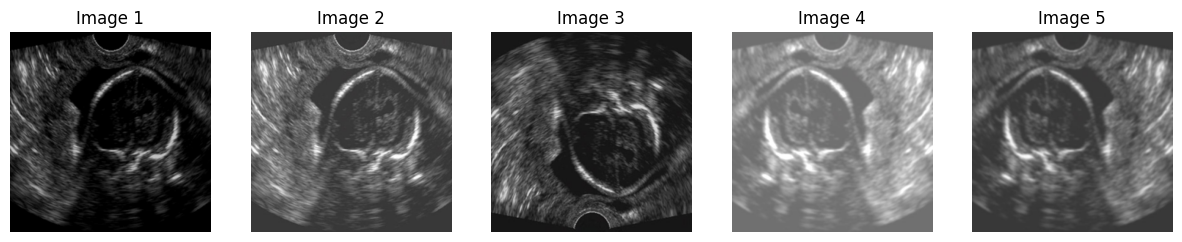

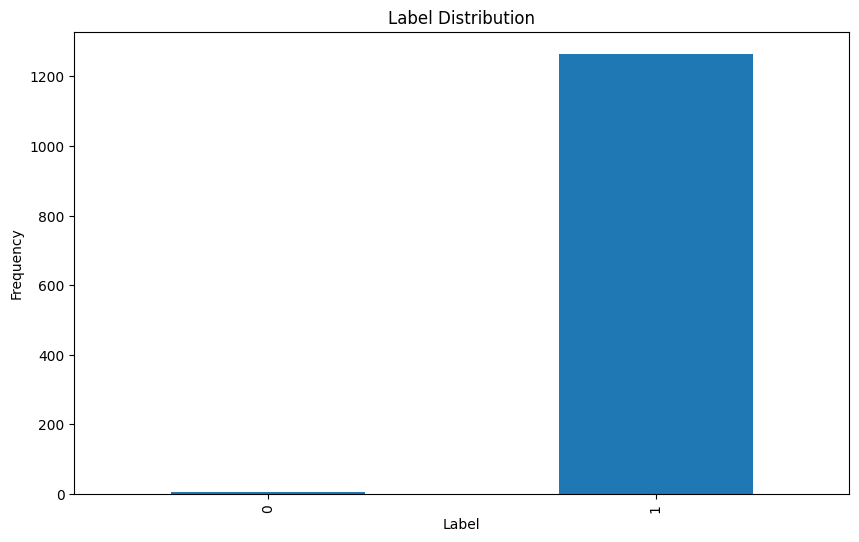

In [13]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd
# Define paths
train_images_path = "/content/Fetal-brain-on-augmented-images-1/train/images"
train_labels_path = "/content/Fetal-brain-on-augmented-images-1/train/labels"

# List all image and label files
image_files = sorted([os.path.join(train_images_path, f) for f in os.listdir(train_images_path) if f.endswith('.jpg')])
label_files = sorted([os.path.join(train_labels_path, f) for f in os.listdir(train_labels_path) if f.endswith('.txt')])

# Check the number of images and labels
print(f"Number of images: {len(image_files)}")
print(f"Number of labels: {len(label_files)}")
def plot_images_with_labels(image_files, label_files, num_samples=5):
    plt.figure(figsize=(15, 10))
    for i in range(num_samples):
        img = Image.open(image_files[i])
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.title(f"Image {i+1}")
        plt.axis('off')

        # Read the corresponding label file
        with open(label_files[i], 'r') as f:
            label = f.read()
        print(f"Label for image {i+1}: {label}")

    plt.show()

plot_images_with_labels(image_files, label_files)
def analyze_label_distribution(label_files):
    labels = []
    for label_file in label_files:
        with open(label_file, 'r') as f:
            label = f.read().strip().split()
            if label:  # Check if the label file is not empty
                labels.append(int(label[0]))  # Assuming the first value is the class label

    # Count the frequency of each label
    label_counts = pd.Series(labels).value_counts().sort_index()

    # Plot the distribution
    plt.figure(figsize=(10, 6))
    label_counts.plot(kind='bar')
    plt.title('Label Distribution')
    plt.xlabel('Label')
    plt.ylabel('Frequency')
    plt.show()

analyze_label_distribution(label_files)

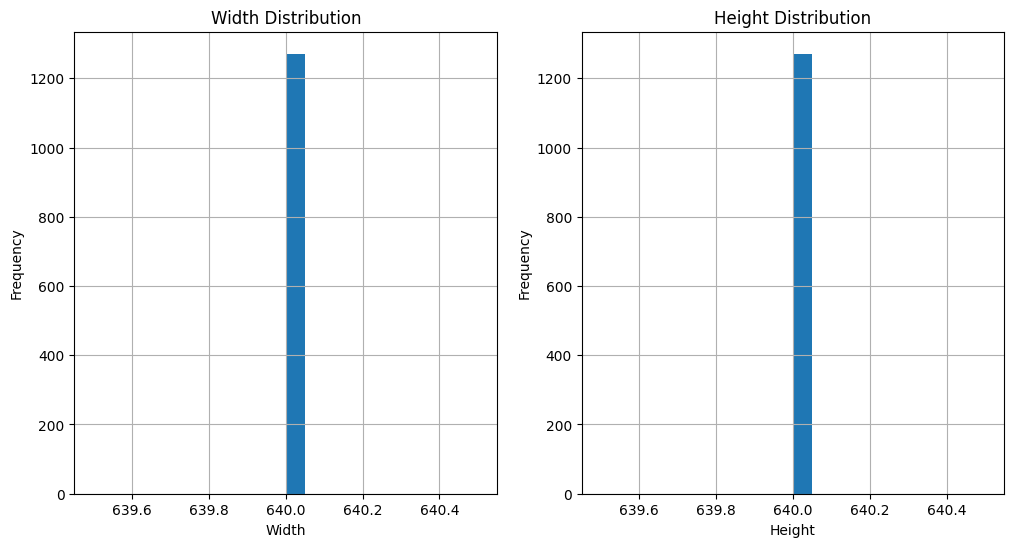

Missing images: {'mild-ventriculomegaly-19c_aug_0_png', 'mild-ventriculomegaly-23a_aug_5_png', 'polencephaly-24c_aug_0_png', 'moderate-ventriculomegaly-34b_aug_1_png', 'mild-ventriculomegaly-23a_aug_2_png', 'mild-ventriculomegaly-23a_aug_1_png'}
Missing labels: set()


In [15]:
def analyze_image_sizes(image_files):
    sizes = []
    for image_file in image_files:
        img = Image.open(image_file)
        sizes.append(img.size)

    # Convert to a DataFrame for easier analysis
    sizes_df = pd.DataFrame(sizes, columns=['Width', 'Height'])

    # Plot the distribution of widths and heights
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sizes_df['Width'].hist(bins=20)
    plt.title('Width Distribution')
    plt.xlabel('Width')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sizes_df['Height'].hist(bins=20)
    plt.title('Height Distribution')
    plt.xlabel('Height')
    plt.ylabel('Frequency')

    plt.show()

analyze_image_sizes(image_files)
def check_for_missing_data(image_files, label_files):
    image_names = [os.path.basename(f).split('.')[0] for f in image_files]
    label_names = [os.path.basename(f).split('.')[0] for f in label_files]

    missing_images = set(label_names) - set(image_names)
    missing_labels = set(image_names) - set(label_names)

    print(f"Missing images: {missing_images}")
    print(f"Missing labels: {missing_labels}")

check_for_missing_data(image_files, label_files)

Number of images: 1271
Number of labels: 1289
Average image width: 640.0
Average image height: 640.0
Label distribution:
0       6
1    1265
Name: count, dtype: int64


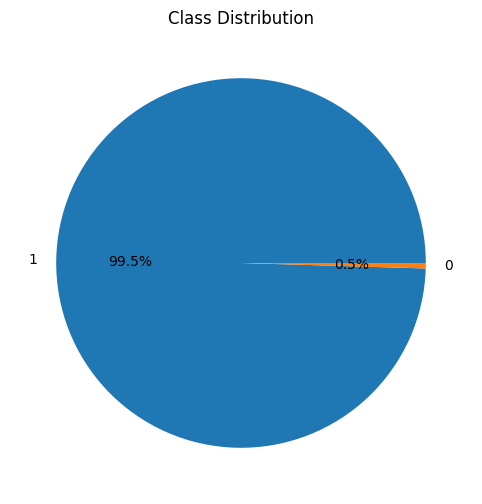

In [19]:
def summary_statistics(image_files, label_files):
    # Number of images and labels
    num_images = len(image_files)
    num_labels = len(label_files)

    # Image sizes
    sizes = [Image.open(img).size for img in image_files]
    widths, heights = zip(*sizes)

    # Label distribution
    labels = []
    for label_file in label_files:
        with open(label_file, 'r') as f:
            label = f.read().strip().split()
            if label:  # Check if the label file is not empty
                labels.append(int(label[0]))  # Assuming the first value is the class label

    label_counts = pd.Series(labels).value_counts().sort_index()

    print(f"Number of images: {num_images}")
    print(f"Number of labels: {num_labels}")
    print(f"Average image width: {np.mean(widths)}")
    print(f"Average image height: {np.mean(heights)}")
    print("Label distribution:")
    print(label_counts)

summary_statistics(image_files, label_files)
def visualize_class_distribution(label_files):
    labels = []
    for label_file in label_files:
        with open(label_file, 'r') as f:
            label = f.read().strip().split()
            if label:  # Check if the label file is not empty
                labels.append(int(label[0]))  # Assuming the first value is the class label

    # Plot the distribution
    plt.figure(figsize=(10, 6))
    pd.Series(labels).value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Class Distribution')
    plt.ylabel('')
    plt.show()

visualize_class_distribution(label_files)

Class imbalance ratio: 210.83


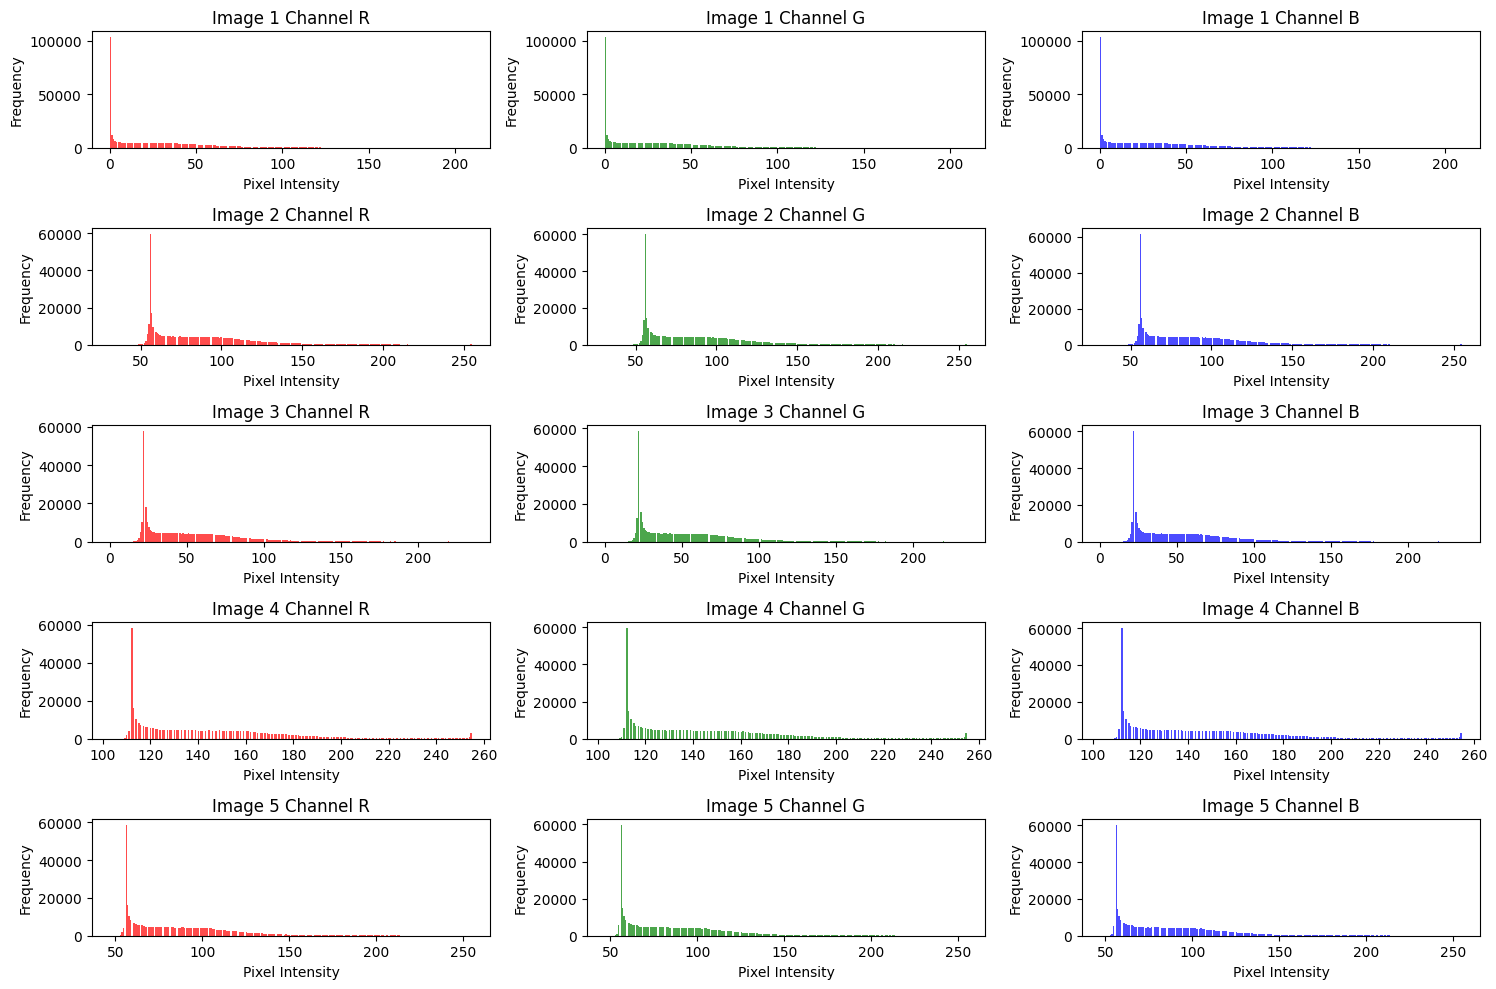

In [21]:
def check_class_imbalance(label_files):
    labels = []
    for label_file in label_files:
        with open(label_file, 'r') as f:
            label = f.read().strip().split()
            if label:  # Check if the label file is not empty
                labels.append(int(label[0]))

    label_counts = pd.Series(labels).value_counts()
    imbalance_ratio = label_counts.max() / label_counts.min()

    print(f"Class imbalance ratio: {imbalance_ratio:.2f}")

check_class_imbalance(label_files)
def visualize_image_channels(image_files, num_samples=5):
    plt.figure(figsize=(15, 10))
    for i in range(num_samples):
        img = Image.open(image_files[i])
        img_array = np.array(img)

        for j in range(3):  # For each channel (R, G, B)
            plt.subplot(num_samples, 3, i*3 + j + 1)
            plt.hist(img_array[:, :, j].ravel(), bins=256, color=['red', 'green', 'blue'][j], alpha=0.7)
            plt.title(f"Image {i+1} Channel {['R', 'G', 'B'][j]}")
            plt.xlabel('Pixel Intensity')
            plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

visualize_image_channels(image_files)

No corrupted images found.
Invalid label format in file: /content/Fetal-brain-on-augmented-images-1/train/labels/anold-chiari-maformation-26b_aug_0_png.rf.0b423e744315a0c45073da4506033383.txt
Invalid label format in file: /content/Fetal-brain-on-augmented-images-1/train/labels/anold-chiari-maformation-26b_aug_0_png.rf.cd56258a951d6185db6c5b570acfcee5.txt
Invalid label format in file: /content/Fetal-brain-on-augmented-images-1/train/labels/anold-chiari-maformation-26b_aug_0_png.rf.d246ea040a59b3e345c0e0349acc7d16.txt
Invalid label format in file: /content/Fetal-brain-on-augmented-images-1/train/labels/anold-chiari-maformation-26b_aug_1_png.rf.07e26965e4be6812b998313ff045f035.txt
Invalid label format in file: /content/Fetal-brain-on-augmented-images-1/train/labels/anold-chiari-maformation-26b_aug_1_png.rf.84745cb818de2db6760bd225b1632cc8.txt


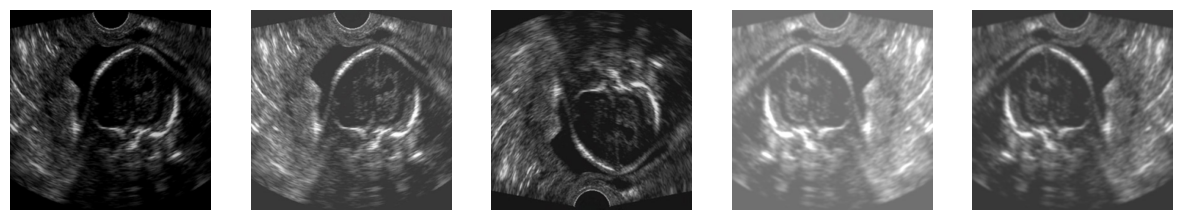

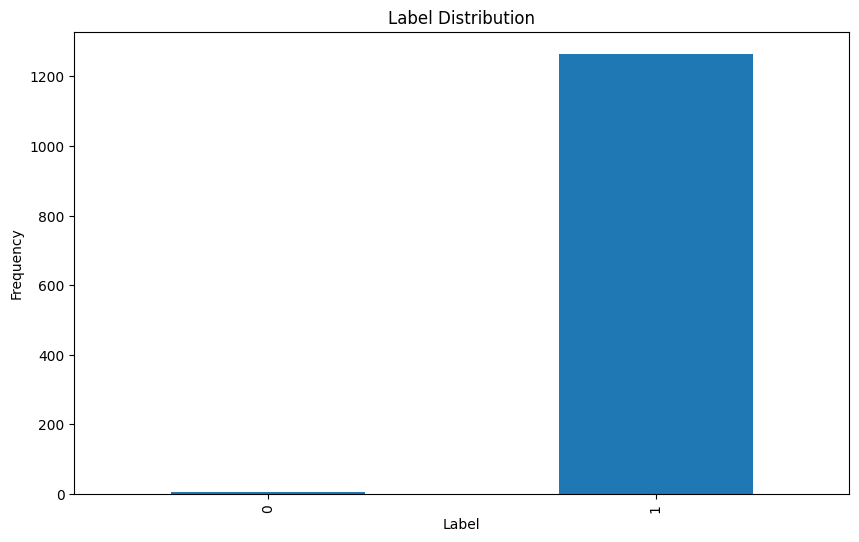

<Figure size 640x480 with 0 Axes>

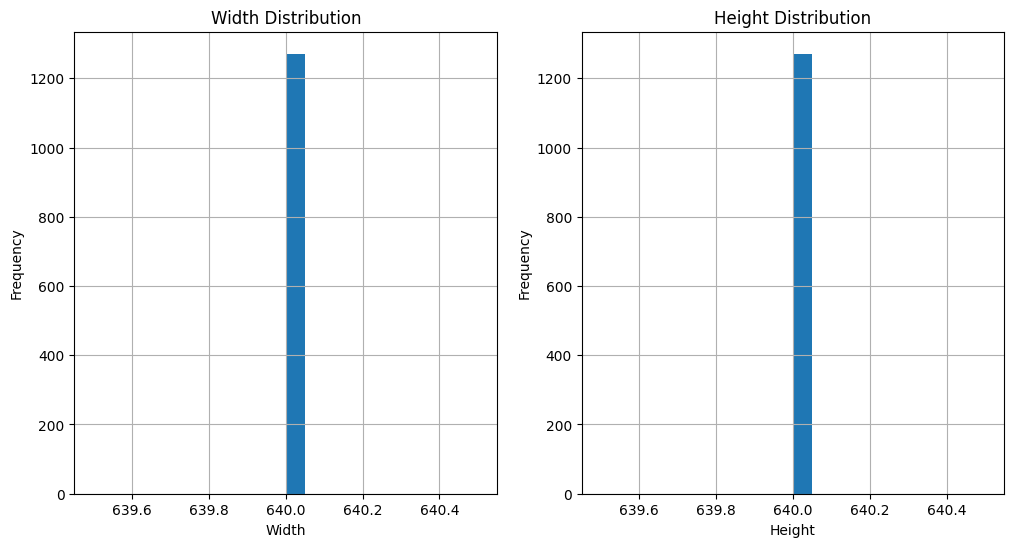

<Figure size 640x480 with 0 Axes>

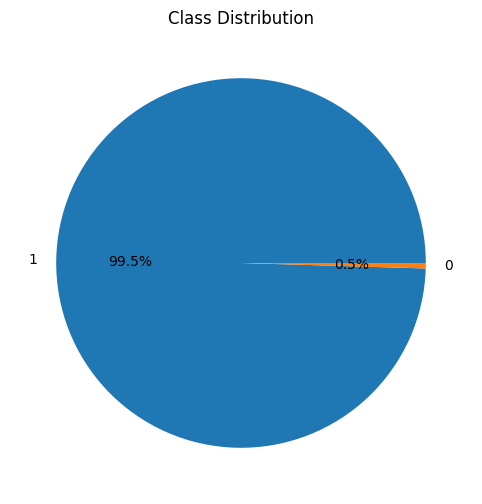

<Figure size 640x480 with 0 Axes>

In [25]:
def check_for_corrupted_images(image_files):
    corrupted_images = []
    for image_file in image_files:
        try:
            img = Image.open(image_file)
            img.verify()  # Verify that it is, in fact, an image
        except (IOError, SyntaxError) as e:
            print(f"Corrupted image: {image_file}")
            corrupted_images.append(image_file)

    if not corrupted_images:
        print("No corrupted images found.")
    else:
        print(f"Total corrupted images: {len(corrupted_images)}")

check_for_corrupted_images(image_files)
def visualize_bounding_boxes(image_files, label_files, num_samples=5):
    plt.figure(figsize=(15, 10))
    for i in range(num_samples):
        img = Image.open(image_files[i])
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)

        # Read the corresponding label file
        with open(label_files[i], 'r') as f:
            label = f.read().strip().split()
            if label and len(label) == 5:  # Check if the label file has exactly 5 values
                # Assuming the label format is: class x_center y_center width height
                class_id, x_center, y_center, width, height = map(float, label)
                img_width, img_height = img.size
                x = (x_center - width/2) * img_width
                y = (y_center - height/2) * img_height
                w = width * img_width
                h = height * img_height

                # Draw the bounding box
                plt.gca().add_patch(plt.Rectangle((x, y), w, h, edgecolor='red', facecolor='none', linewidth=2))
                plt.title(f"Image {i+1} with Bounding Box")
            else:
                print(f"Invalid label format in file: {label_files[i]}")

        plt.axis('off')

    plt.show()

visualize_bounding_boxes(image_files, label_files)
def save_eda_results(image_files, label_files, output_dir="eda_results"):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Save label distribution plot
    analyze_label_distribution(label_files)
    plt.savefig(os.path.join(output_dir, 'label_distribution.png'))

    # Save image size distribution plot
    analyze_image_sizes(image_files)
    plt.savefig(os.path.join(output_dir, 'image_size_distribution.png'))

    # Save class distribution plot
    visualize_class_distribution(label_files)
    plt.savefig(os.path.join(output_dir, 'class_distribution.png'))

    # Save summary statistics
    with open(os.path.join(output_dir, 'summary_statistics.txt'), 'w') as f:
        import sys
        original_stdout = sys.stdout
        sys.stdout = f
        summary_statistics(image_files, label_files)
        sys.stdout = original_stdout

save_eda_results(image_files, label_files)

In [ ]:
# prompt: /content/Fetal-brain-on-augmented-images-1/train/images
# count the number of images which has 0 as a label and 1 as a label and tell me the number of images that have

import os

image_dir = "/content/Fetal-brain-on-augmented-images-1/train/images"
label_dir = "/content/Fetal-brain-on-augmented-images-1/train/labels"

label_counts = {0: 0, 1: 0}

for filename in os.listdir(label_dir):
    if filename.endswith(".txt"):
        filepath = os.path.join(label_dir, filename)
        with open(filepath, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if parts:  # Check if the line is not empty
                    try:
                        class_id = int(parts[0])
                        if class_id in label_counts:
                          label_counts[class_id] +=1
                    except (ValueError, IndexError):
                        print(f"Skipping invalid line in {filename}: {line}")

print(f"Number of images with label 0: {label_counts[0]}")
print(f"Number of images with label 1: {label_counts[1]}")
print(f"Total number of images: {sum(label_counts.values())}")

Number of images with label 0: 1089
Number of images with label 1: 1155
Total number of images: 2244


In [ ]:
# prompt: from the above code, tell me which images have more than 2 labels and create a separate folder

import os
import shutil

# Define the directories
image_dir = "/content/Fetal-brain-on-augmented-images-1/train/images"
label_dir = "/content/Fetal-brain-on-augmented-images-1/train/labels"
new_folder = "/content/images_with_more_than_two_labels"

# Create the new folder if it doesn't exist
os.makedirs(new_folder, exist_ok=True)

# Iterate through the images
for filename in os.listdir(image_dir):
    if filename.endswith((".jpg", ".jpeg", ".png")):  # Check for image extensions
        image_name = os.path.splitext(filename)[0]
        label_file = os.path.join(label_dir, image_name + ".txt")

        if os.path.exists(label_file):
            with open(label_file, 'r') as f:
                label_count = sum(1 for _ in f)

            if label_count > 2 :
                # Move the image and label file to the new folder
                image_path = os.path.join(image_dir, filename)
                new_image_path = os.path.join(new_folder, filename)
                shutil.move(image_path, new_image_path)

                new_label_path = os.path.join(new_folder, image_name + ".txt")
                shutil.move(label_file, new_label_path)
                print(f"Moved image {filename} and label file to {new_folder}")

Moved image intracranial-hemorrdge-34a_aug_3_png.rf.f06b40ac07d6f09532ca5cfc57689254.jpg and label file to /content/images_with_more_than_two_labels
Moved image severe-ventriculomegaly-18a_aug_0_png.rf.69c37e27a0f66f891683e686e017c87a.jpg and label file to /content/images_with_more_than_two_labels
Moved image moderate-ventriculomegaly-27_aug_0_png.rf.a52081ad4527a17ae71e57e93da054b7.jpg and label file to /content/images_with_more_than_two_labels
Moved image intracranial-hemorrdge-34a_aug_4_png.rf.288458029b4bfe4e2f1a3d3d3aec0622.jpg and label file to /content/images_with_more_than_two_labels
Moved image mild-ventriculomegaly-18b_aug_5_png.rf.536bb6e6a1a07b5fe33913aa3b4ace7a.jpg and label file to /content/images_with_more_than_two_labels
Moved image moderate-ventriculomegaly-19c-1-_aug_3_png.rf.33e480de533624e9f9a597150c4d5f48.jpg and label file to /content/images_with_more_than_two_labels
Moved image colphocephaly_29c_aug_0_png.rf.b06dd796ec78b48e05a8e402ac7eeb71.jpg and label file to 

# FOR TESTING

---



In [ ]:
# prompt: /content/Testing images.zip
# unzip this folder

import zipfile

# Specify the path to the zip file and the extraction directory
zip_file_path = "/content/Testing images.zip"
extract_dir = "/content/Testing images"

# Create the extraction directory if it doesn't exist
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

Abnormality detected: arachnoid cyst

image 1/1 /content/Fetal-brain-on-augmented-images-1/train/images/arachnoid-cyst-27p_aug_2_png.rf.d9ad8eb5a48e9ac0cfcb2963c933c3ee.jpg: 640x640 1 abnormality, 1 fetal skull, 211.3ms
Speed: 4.8ms preprocess, 211.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


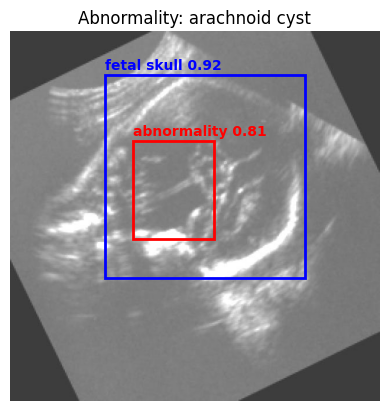

In [ ]:
import os
import re
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ultralytics import YOLO
from PIL import Image

# Path to the trained YOLO model
model_path = '/content/Fetal-brain-on-augmented-images-1/weights/best.pt'

# Load the trained YOLO model
model = YOLO(model_path)

# Function to extract the disease/abnormality name from the filename
def extract_disease_name(file_name):
    # Remove file extension and parse text before any number or special characters
    base_name = os.path.splitext(file_name)[0]
    match = re.match(r"([a-zA-Z\-]+)", base_name)
    if match:
        disease_name = match.group(1).replace("-", " ").strip()
        return disease_name
    return "Unknown"

# Path to the image to test
image_file = "/content/Fetal-brain-on-augmented-images-1/train/images/arachnoid-cyst-27p_aug_2_png.rf.d9ad8eb5a48e9ac0cfcb2963c933c3ee.jpg"  # Replace with your input image file path

# Check if the image file exists
if os.path.exists(image_file):
    # Extract the abnormality name from the filename
    disease_name = extract_disease_name(os.path.basename(image_file))
    print(f"Abnormality detected: {disease_name}")

    # Perform prediction using the YOLO model
    results = model.predict(source=image_file, save=False, save_txt=False)

    # Load the image
    img = Image.open(image_file)
    fig, ax = plt.subplots()
    ax.imshow(img)

    # Add the abnormality name above the image
    plt.title(f"Abnormality: {disease_name}")

    # Define colors for different classes
    colors = ['red', 'blue']  # Add more colors if there are more classes

    # Draw bounding boxes
    for result in results:
        for box in result.boxes.data:
            # Extract bounding box coordinates, confidence, and class
            x1, y1, x2, y2, conf, cls = box.tolist()
            width, height = x2 - x1, y2 - y1
            color = colors[int(cls) % len(colors)]  # Assign color based on class

            # Draw the bounding box
            rect = patches.Rectangle((x1, y1), width, height, linewidth=2, edgecolor=color, facecolor='none')
            ax.add_patch(rect)

            # Add text label above the bounding box
            class_name = result.names[int(cls)]
            ax.text(x1, y1 - 10, f"{class_name} {conf:.2f}", color=color, fontsize=10, weight='bold')

    plt.axis('off')  # Hide axes
    plt.show()
else:
    print(f"Image file '{image_file}' not found.")


In [ ]:
import os
import re
import zipfile
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ultralytics import YOLO
from PIL import Image

# Path to the trained YOLO model
model_path = '/content/Fetal-brain-on-augmented-images-1/weights/best.pt'

# Load the trained YOLO model
model = YOLO(model_path)

# Function to extract the disease/abnormality name from the filename
def extract_disease_name(file_name):
    # Remove file extension and parse text before any number or special characters
    base_name = os.path.splitext(file_name)[0]
    match = re.match(r"([a-zA-Z\-]+)", base_name)
    if match:
        disease_name = match.group(1).replace("-", " ").strip()
        return disease_name
    return "Unknown"

# Paths to the input and output folders
input_folder = "/content/Testing images/Testing images"  # Replace with your input folder path
output_folder = "/content/final_tested_images"  # Replace with your output folder path

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Loop through all images in the input folder
for image_file in os.listdir(input_folder):
    if image_file.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
        image_path = os.path.join(input_folder, image_file)

        # Extract the abnormality name from the filename
        disease_name = extract_disease_name(image_file)
        print(f"Processing image: {image_file} | Abnormality: {disease_name}")

        # Perform prediction using the YOLO model
        results = model.predict(source=image_path, save=False, save_txt=False)

        # Load the image
        img = Image.open(image_path)
        fig, ax = plt.subplots()
        ax.imshow(img)

        # Define colors for different classes
        colors = ['red', 'blue']  # Add more colors if there are more classes

        # Draw bounding boxes
        for result in results:
            for box in result.boxes.data:
                # Extract bounding box coordinates, confidence, and class
                x1, y1, x2, y2, conf, cls = box.tolist()
                width, height = x2 - x1, y2 - y1
                color = colors[int(cls) % len(colors)]  # Assign color based on class

                # Draw the bounding box
                rect = patches.Rectangle((x1, y1), width, height, linewidth=2, edgecolor=color, facecolor='none')
                ax.add_patch(rect)

                # Add text label above the bounding box
                class_name = result.names[int(cls)]
                ax.text(x1, y1 - 10, f"{class_name} {conf:.2f}", color=color, fontsize=10, weight='bold')

        plt.axis('off')  # Hide axes

        # Save the processed image in the output folder
        output_image_path = os.path.join(output_folder, image_file)  # Keep the filename unchanged
        plt.savefig(output_image_path, bbox_inches='tight', pad_inches=0)
        plt.close(fig)  # Close the plot to free memory

# Create a zip file containing all processed images
zip_file_path = "/content/final_tested_images.zip"
with zipfile.ZipFile(zip_file_path, 'w') as zipf:
    for root, dirs, files in os.walk(output_folder):
        for file in files:
            zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), output_folder))

print(f"Processed images have been saved and zipped into: {zip_file_path}")

# Optional: Code to download the zip file (useful in Colab)
from google.colab import files
files.download(zip_file_path)


Processing image: moderate-ventriculomegaly-34_aug_1_png.rf.7926159baa9a4b579238d26762f0e84d.jpg | Abnormality: moderate ventriculomegaly

image 1/1 /content/Testing images/Testing images/moderate-ventriculomegaly-34_aug_1_png.rf.7926159baa9a4b579238d26762f0e84d.jpg: 640x640 1 abnormality, 1 fetal skull, 203.8ms
Speed: 4.2ms preprocess, 203.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Processing image: moderate-ventriculomegaly-34c_aug_4_png.rf.2e66b8f002c31398220fc172a265f121.jpg | Abnormality: moderate ventriculomegaly

image 1/1 /content/Testing images/Testing images/moderate-ventriculomegaly-34c_aug_4_png.rf.2e66b8f002c31398220fc172a265f121.jpg: 640x640 1 abnormality, 1 fetal skull, 213.4ms
Speed: 4.0ms preprocess, 213.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processing image: polencephaly-23k_aug_0_png.rf.b24cb0ada4c2948c7669a2b30abea3b5.jpg | Abnormality: polencephaly

image 1/1 /content/Testing images/Testing images/polencephal

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>